In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Time Value of Money Under Uncertainty
## A Monte Carlo Approach Using Probability Theory and Numerical Simulation
## Scientific Method Approach

# 1. Observation

In classical financial theory, the Net Present Value (NPV) of a project is computed using deterministic future cash flow.

However, in real-world financial planning and analysis, future cash flow are uncertain and depend on economic conditions, demand variability and operation performance.

This raises the question: how should project valuation change when cash flow are random?


## 2. Research Question

If future cash flows are random variables instead of fixed numbers,
how does this affect the mathematical nature of Net Present Value ( NPV ) ?

Specifically:

* Does NPV become random variable
* What are its expected value variance?
* How can we approximate its distribution using simulation?

## 3. Hypothesis

If each cash flow $$ ( CF_t ) $$ is modeled as a random variable, then:

$$ NPV = \sum_{t=0}^{T} \frac{CF_t}{(1+r)^t} $$

is a linear combination of random variables.

Therefore:

• NPV is itself a random variable.
• It has a well-defined expected value.
• It has a measurable variance (risk).
• Its distribution can be approximated numerically using Monte Carlo simulation.

## 4. Deterministic Mathematical Model

In classical Time Value of Money, capital grows exponentially under compound interest.

If an initial investment $( P )$ grows at rate $(r)$ for $(t)$ periods:

$$ FV = P(1+r)^t $$

Solving for present value:

$$ PV = \frac{FV}{(1+r)^t} $$

Thus, discounting is the inverse operation of exponential growth

### Implementation Strategy and Numerical Example

The deterministic formulas derived above are now implemented in Python
These function will later serve as the core building blocks for the [stochastic extention.](https://en.wikipedia.org/wiki/Stochastic_process)

We verify the deterministic TVM formulas using a simple example.

* Initial Investment: 1000
* Interest Rate: 3%
* Time Horizon: 3 years

In [12]:
def future_value(p, r, t):
    return p * (1+r) ** t

def present_value(fv, r, t):
    return fv / (1+r) ** t

p = 1000
r = 0.05
t = 3

FV = future_value(p,r,t)
PV = present_value(FV, r, t)
PV_recovered = present_value(FV, r, t)

print("Future Value: ", FV)
print("Present Value: ", PV)
print("Recovered Value: ", PV_recovered)
print("Numerical Error:", abs(PV - PV_recovered))


Future Value:  1157.6250000000002
Present Value:  1000.0000000000001
Recovered Value:  1000.0000000000001
Numerical Error: 0.0


### Exponential Growth Visualization

To build intuition for compound interest, we visualize the future value function:

$$ FV(t) = P(1+r)^t $$

This function represents exponential growth. Unlike linear growth, the rate of increase accelerates over time because interest is earned on accumulated interest.

Understanding this curvature is important before introduction uncertainty, since longer time horizons amplify both expected returns and potential risk.

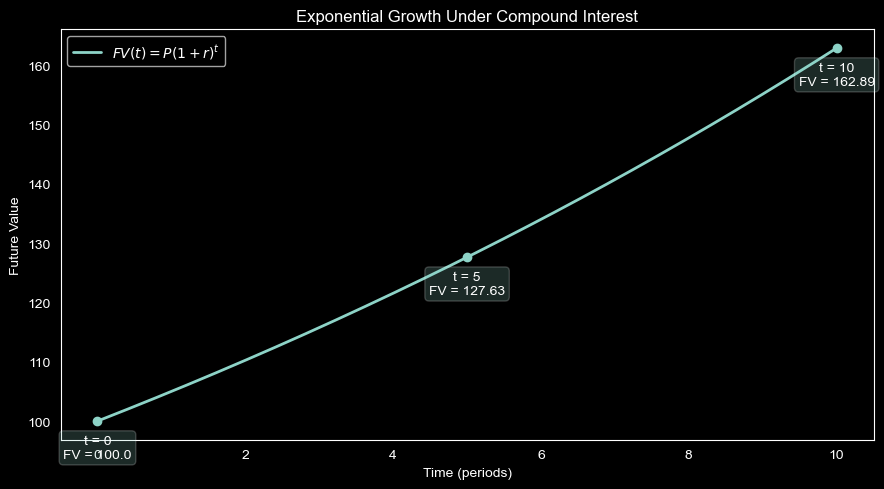

In [33]:
t_values = np.linspace(0, 10, 200)
P = 100
r = 0.05

growth = future_value(P, r, t_values)

plt.figure(figsize=(9, 5))
plt.plot(t_values, growth, linewidth=2, label=r"$FV(t)=P(1+r)^t$")

# Highlight a few key points for intuition
key_t = np.array([0, 5, 10])
key_fv = future_value(P, r, key_t)
plt.scatter(key_t, key_fv, zorder=3)

for i in range(len(key_t)):
    tt = key_t[i]
    ff = key_fv[i]

    plt.annotate(
        "t = " + str(tt) + "\nFV = " + str(round(ff, 2)),
        xy=(tt, ff),
        xytext=(0, -10),   # move text below point
        textcoords="offset points",
        ha="center",
        va="top",
        bbox=dict(boxstyle="round,pad=0.3", alpha=0.2)
    )

plt.title("Exponential Growth Under Compound Interest")
plt.xlabel("Time (periods)")
plt.ylabel("Future Value")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.grid(None)
plt.show()